In [35]:
# prepare mnist data

# Load the data
import pandas as pd
import numpy as np
mnist = pd.read_csv("../input/train.csv")

# re-organize the data
mnist_images = mnist.iloc[:, 1:]
mnist_images = mnist_images / 255.0 # convert data type to float and range from [0,1]
mnist_labels = mnist.iloc[:, 0]

(42000, 784)
(42000,)
0
0


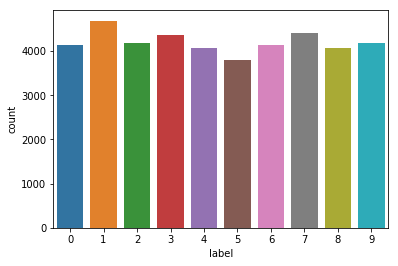

In [36]:
# visualize the data shape
print(mnist_images.shape)
print(mnist_labels.shape)

import seaborn as sns
g = sns.countplot(mnist_labels)
mnist_labels.value_counts()

# check if there is any null data
import numpy as np
print(np.sum(np.sum(mnist_images.isnull())))
print(np.sum(np.sum(mnist_labels.isnull())))
#print(np.sum(np.sum(test_images.isnull())))

In [49]:
# split to train and test set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(mnist_images, mnist_labels, test_size=0.3, random_state=0)
print("train set number: ", train_labels.shape)
print("test set number: ", test_labels.shape)

print("train set distribution")
print(train_labels.value_counts())
print("test set distribution")
print(test_labels.value_counts())

# convert pd to array, and reshape
train_images = np.array(train_images).reshape((-1,28,28))
test_images  = np.array(test_images).reshape((-1,28,28))
train_labels = np.array(train_labels)
test_labels  = np.array(test_labels)

train set number:  (29400,)
test set number:  (12600,)
train set distribution
1    3255
7    3067
3    3053
9    2969
2    2901
6    2894
0    2890
8    2859
4    2836
5    2676
Name: label, dtype: int64
test set distribution
1    1429
7    1334
3    1298
2    1276
6    1243
0    1242
4    1236
9    1219
8    1204
5    1119
Name: label, dtype: int64


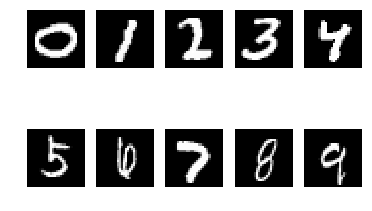

In [50]:
# demo display the image
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
for i in range(10):
    i_image = train_images[np.where(train_labels==i)[0][0]]
    plt.subplot(2, 5, i+1)
    plt.imshow(i_image, cmap='gray')
    plt.axis('off')

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

# model parameters
g_input_shape = 100
hidden_1_num_units = 500
hidden_2_num_units = 500
g_output_num_units = 784

d_input_shape = (28, 28)
d_output_num_units = 1

# setup generator model
model_generator = Sequential([
    Dense(units=hidden_1_num_units, input_dim=g_input_shape, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
    Dense(units=g_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
    Reshape(d_input_shape)])

# setup discriminator model
model_discriminator = Sequential([
    InputLayer(input_shape=d_input_shape),
    Flatten(),        
    Dense(units=hidden_1_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),        
    Dense(units=d_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5))])

model_generator.summary()

model_discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_47 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_48 (Dense)             (None, 784)               392784    
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28)            0         
Total params: 693,784
Trainable params: 693,784
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dens

In [101]:
adam = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)

model_generator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model_discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Set discriminator weights to non-trainable
# (will only apply to the `gan` model)
model_discriminator.trainable = False

gan_input = keras.Input(shape=(g_input_shape,))
gan_output = model_discriminator(model_generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 100)               0         
_________________________________________________________________
sequential_16 (Sequential)   (None, 28, 28)            693784    
_________________________________________________________________
sequential_17 (Sequential)   (None, 1)                 643501    
Total params: 1,337,285
Trainable params: 693,784
Non-trainable params: 643,501
_________________________________________________________________


training epoch:  0
0 [0.47478765, 0.5] [4.4668303, 0.0]
training epoch:  1
1 [0.43497637, 0.5] [4.4001393, 0.0]
training epoch:  2
2 [0.4229848, 0.5] [3.848914, 0.0]
training epoch:  3
3 [0.3971626, 0.5] [4.3889694, 0.0]
training epoch:  4
4 [0.3657928, 0.5] [4.9358463, 0.0]
training epoch:  5
5 [0.36580864, 0.5] [4.943944, 0.0]
training epoch:  6
6 [0.3444858, 0.5] [4.7717505, 0.0]
training epoch:  7
7 [0.36339918, 0.5] [5.615345, 0.0]
training epoch:  8
8 [0.32741898, 0.5] [5.1754413, 0.0]
training epoch:  9
9 [0.31691477, 0.5] [5.8597226, 0.0]
training epoch:  10
10 [0.30544987, 0.5] [5.9077563, 0.0]
training epoch:  11
11 [0.30109528, 0.5] [6.0157795, 0.0]
training epoch:  12
12 [0.31011206, 0.5] [5.342748, 0.0]
training epoch:  13
13 [0.2848017, 0.5] [6.981687, 0.0]
training epoch:  14
14 [0.28041902, 0.5] [6.6871896, 0.0]
training epoch:  15
15 [0.28133214, 0.5] [6.0929627, 0.0]
training epoch:  16
16 [0.27876416, 0.5] [5.5167823, 0.0]
training epoch:  17
17 [0.32206145, 0.5] [6.

ValueError: x and y must have same first dimension, but have shapes (50,) and (2,)

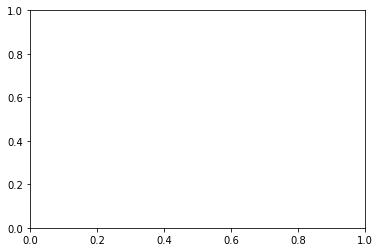

In [102]:
dLosses = []
gLosses = []

batchSize=128
epochs = 50
for e in range(epochs):
    print("training epoch: ", e)
    batchCount = int(train_images.shape[0] / batchSize)
    for batch_ in range(batchCount):
        # Get a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batchSize, g_input_shape])
        imageBatch = train_images[np.random.randint(0, train_images.shape[0], size=batchSize)]
        
        # Generate fake MNIST images
        generatedImages = model_generator.predict(noise)

        X = np.concatenate([imageBatch, generatedImages])
        
        # Labels for generated and real data
        yDis = np.zeros(2*batchSize)
        # One-sided label smoothing
        yDis[:batchSize] = 0.9
        
        # Train discriminator
        model_discriminator.trainable = True
        dloss = model_discriminator.train_on_batch(X, yDis)
        
        # Train generator
        noise = np.random.normal(0, 1, size=[batchSize, g_input_shape])
        yGen = np.ones(batchSize)
        model_discriminator.trainable = False
        gloss = gan.train_on_batch(noise, yGen)

    # Store loss of most recent batch from this epoch
    dLosses.append(dloss)
    gLosses.append(gloss)
    print(e, dloss, gloss)

# plot the loss
plt.figure()
plt.plot(range(len(dLosses)), dLosses[0], 'r')
plt.plot(range(len(gLosses)), gLosses[0], 'b')

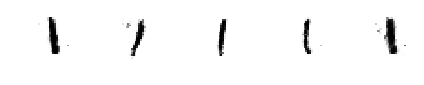

In [111]:
noise = np.random.normal(0, 1, size=(10, g_input_shape))
generated_images = model_generator.predict(noise)
generated_images = generated_images.reshape(10, 28, 28)

plt.figure()
for i in range(generated_images.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
    plt.tight_layout()